In [1]:
# install.packages('dplyr')

library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
df <- read.table('youtube.txt', sep = ' ')
head(df)

DIAS,VIEWS,INSCRITOS,CANAL
1,5200,66,inventonahora
2,4600,89,inventonahora
3,5200,103,inventonahora
4,4400,87,inventonahora
5,5100,102,inventonahora
6,6200,93,inventonahora


In [3]:
str(df)

'data.frame':	1457 obs. of  4 variables:
 $ DIAS     : int  1 2 3 4 5 6 7 8 9 10 ...
 $ VIEWS    : int  5200 4600 5200 4400 5100 6200 4800 4500 3700 3700 ...
 $ INSCRITOS: int  66 89 103 87 102 93 61 74 53 70 ...
 $ CANAL    : Factor w/ 2 levels "inventonahora",..: 1 1 1 1 1 1 1 1 1 1 ...


In [4]:
colnames(df)

[1] "DIAS"      "VIEWS"     "INSCRITOS" "CANAL"

In [5]:
unique(df$CANAL)

[1] inventonahora vocesabia    
Levels: inventonahora vocesabia

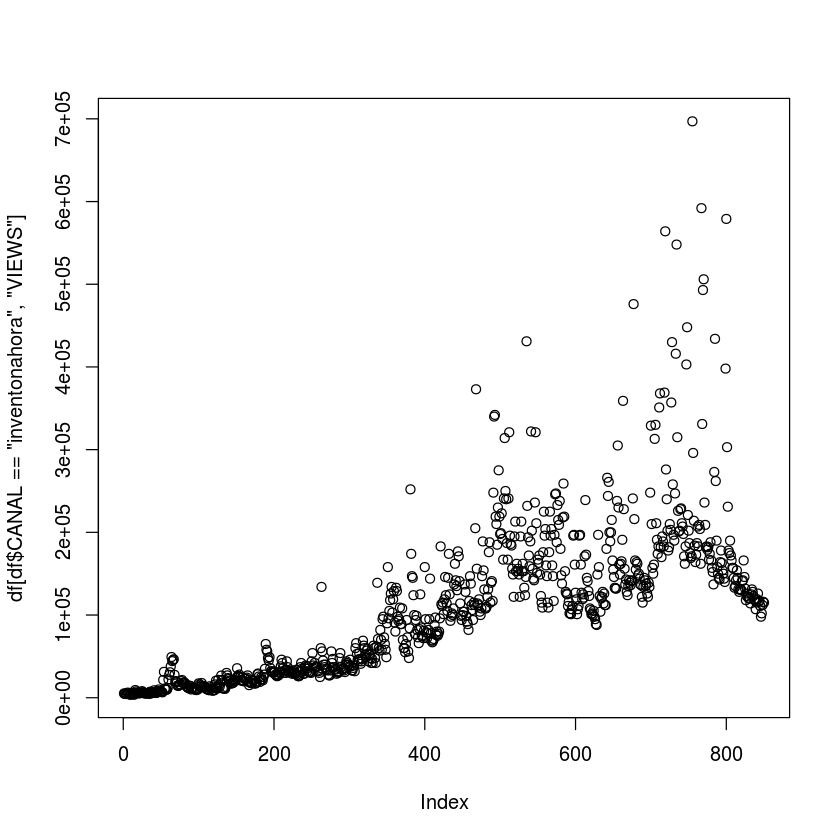

In [6]:
plot(df[df$CANAL == 'inventonahora', 'VIEWS'])

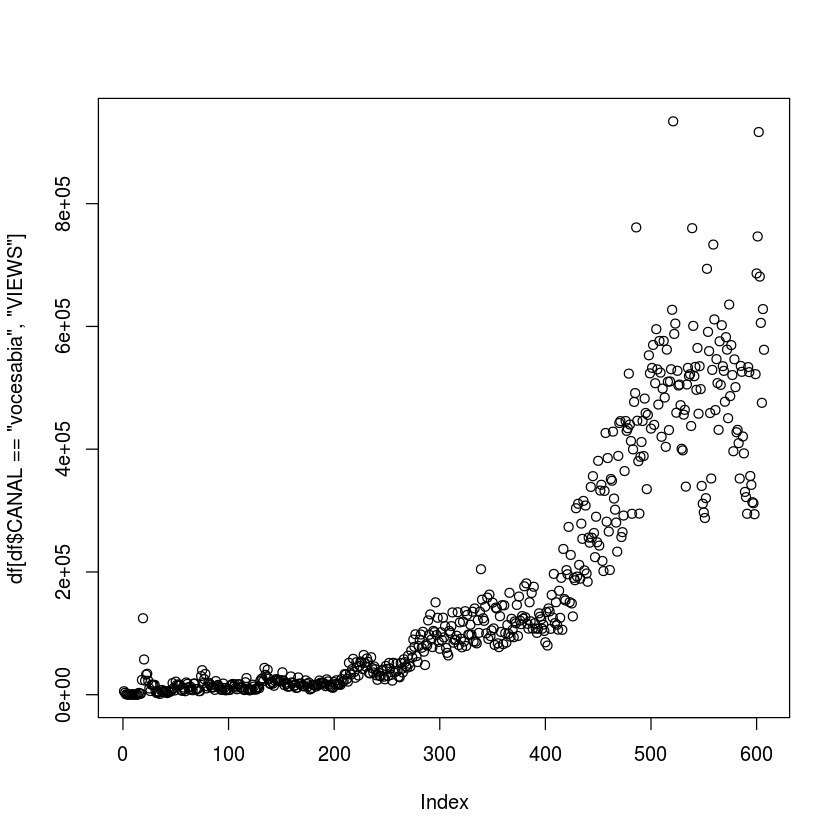

In [7]:
plot(df[df$CANAL == 'vocesabia', 'VIEWS'])

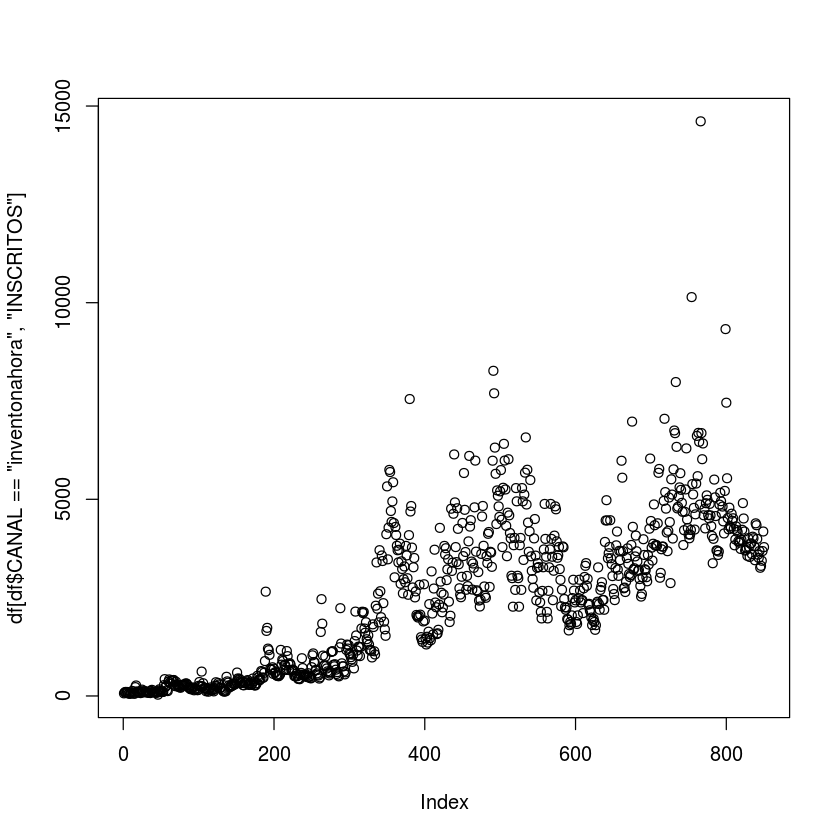

In [8]:
plot(df[df$CANAL == 'inventonahora', 'INSCRITOS'])

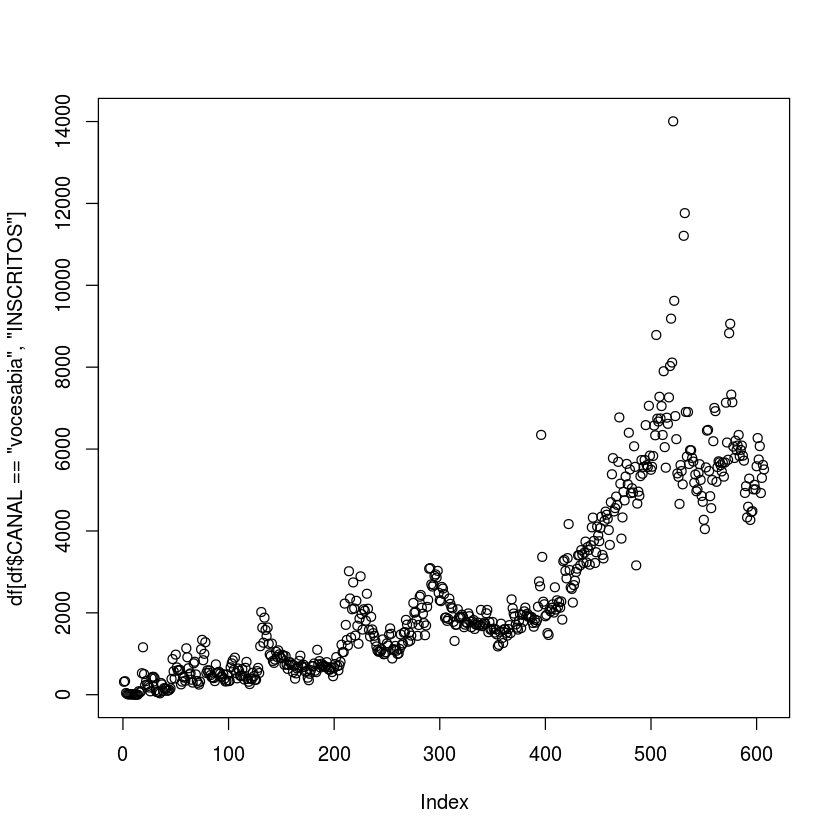

In [9]:
plot(df[df$CANAL == 'vocesabia', 'INSCRITOS'])

In [10]:
# adding an accumlated sum of the VIEWS and SUBSCRIBERS columns:

df <- mutate(group_by(df, CANAL), VIEWS_CUMSUM = cumsum(VIEWS))
df <- mutate(group_by(df, CANAL), INSCRITOS_CUMSUM = cumsum(INSCRITOS))

In [11]:
head(df)

DIAS,VIEWS,INSCRITOS,CANAL,VIEWS_CUMSUM,INSCRITOS_CUMSUM
1,5200,66,inventonahora,5200,66
2,4600,89,inventonahora,9800,155
3,5200,103,inventonahora,15000,258
4,4400,87,inventonahora,19400,345
5,5100,102,inventonahora,24500,447
6,6200,93,inventonahora,30700,540


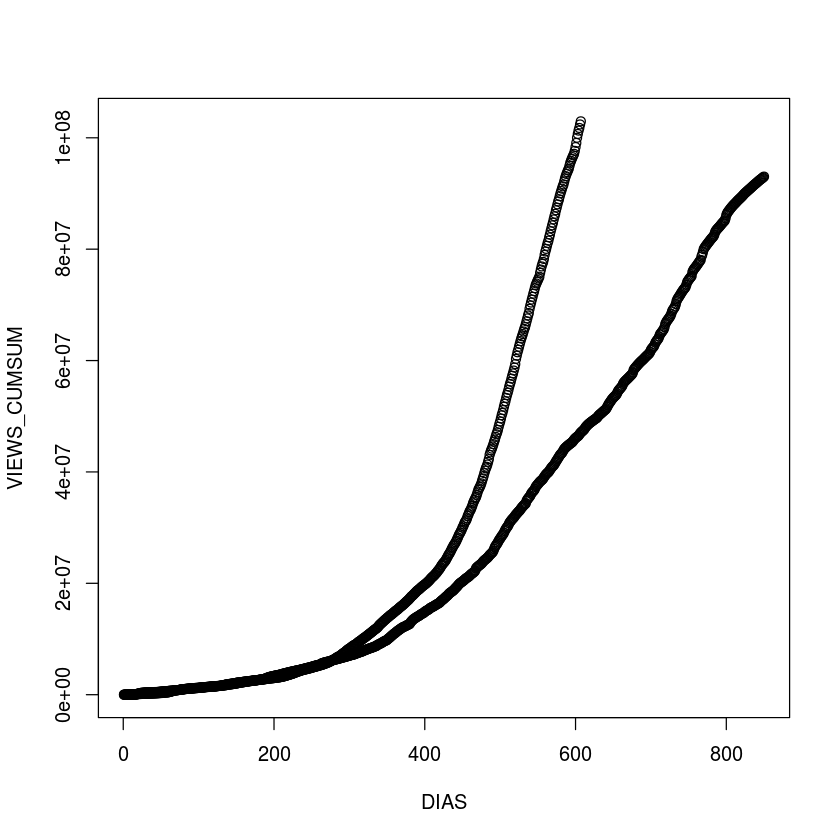

In [12]:
#  plot('VIEWS_CUMSUM ~ DIAS', data = df, by = 'CANAL')
plot(VIEWS_CUMSUM ~ DIAS, data = df)

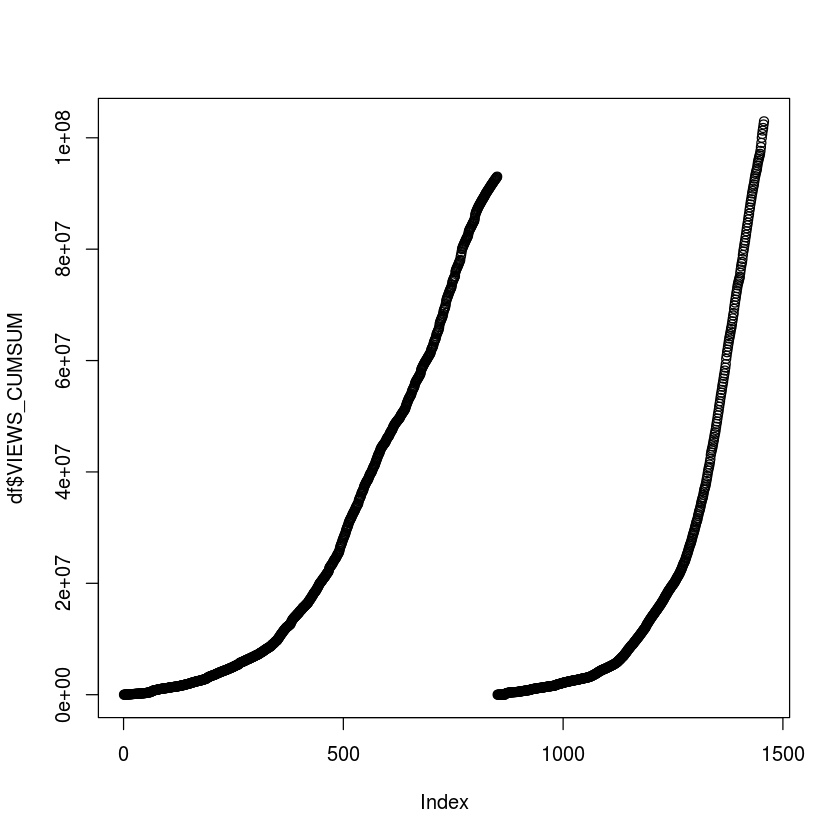

In [13]:
plot(df$VIEWS_CUMSUM)

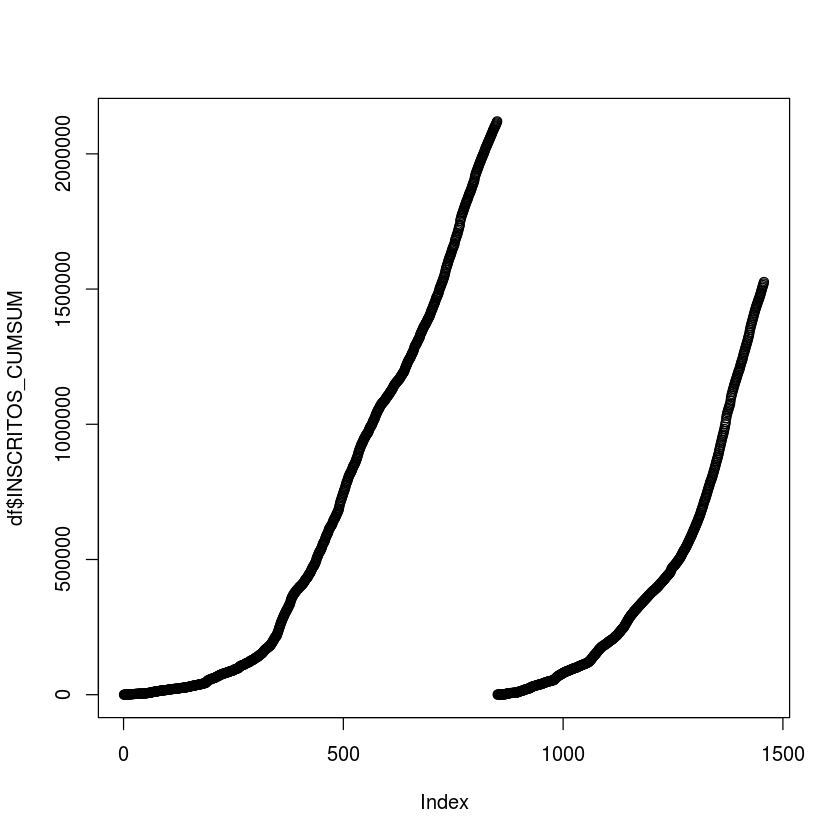

In [14]:
plot(df$INSCRITOS_CUMSUM)

In [15]:
# g <- ggplot(df, aes(DIAS))
# # g <- g + geom_line(aes(y = df[df$CANAL == 'vocesabia', 'VIEWS_CUMSUM']), colour = 'red')
# g <- g + geom_line(aes(y = filter(df, CANAL == 'inventonahora')$VIEWS_CUMSUM), colour = 'red')
# g

In [16]:
inventonahora <- filter(df, CANAL == 'inventonahora')
inventonahora$LOG_INSCRITOS_CUMSUM <- log(inventonahora$INSCRITOS_CUMSUM)
vocesabia <- filter(df, CANAL == 'vocesabia')
vocesabia$LOG_INSCRITOS_CUMSUM <- log(vocesabia$INSCRITOS_CUMSUM)
# vocesabia$LOG_INSCRITOS_CUMSUM <- vocesabia$INSCRITOS_CUMSUM / 1000

# Quadractic loss with linear function:

In [17]:
f_ols <- function(par, y, x) {
    mu <- par[1] + par[2] * x
    SQ <- sum( (y - mu) ^ 2 )
    return(SQ)
}

In [18]:
fit_ols <- optim(par = c(0, 0), fn = f_ols, y = df$VIEWS_CUMSUM, x = df$DIAS)
fit_ols

ERROR while rich displaying an object: Error in vapply(seq_along(mapped), function(i) {: values must be length 1,
 but FUN(X[[5]]) result is length 0

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_html.list(obj)
9. repr_list_generic(obj, "html", "\t<li>%s</li>\n", "\t<dt>$%s</dt>\n\t\t<dd>%s</dd>\n", 
 .     "<strong>$%s</strong> = %s", "<ol>\n%s</ol>\n", "<dl>\n%s</dl>\n", 
 .     numeric_item = "\t<dt>[[%s]]</dt>\n\t\

$par
[1] 15346.53 82451.10

$value
[1] 3.344582e+17

$counts
function gradient 
      91       NA 

$convergence
[1] 0

$message
NULL


# Quadractic loss with logistic function

In [19]:
f_logit <- function(par, y, x) {
    mu <- 1 / ( 1 + exp( - ( par[1] + par[2] * x)))
    SQ_logit <- sum( ( y - mu ) ^ 2)
    return(SQ_logit)
}

In [20]:
fit_logit <- optim(par = c(0, 0), fn = f_logit, y = vocesabia$LOG_INSCRITOS_CUMSUM, x = vocesabia$DIAS)
fit_logit

ERROR while rich displaying an object: Error in vapply(seq_along(mapped), function(i) {: values must be length 1,
 but FUN(X[[5]]) result is length 0

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_html.list(obj)
9. repr_list_generic(obj, "html", "\t<li>%s</li>\n", "\t<dt>$%s</dt>\n\t\t<dd>%s</dd>\n", 
 .     "<strong>$%s</strong> = %s", "<ol>\n%s</ol>\n", "<dl>\n%s</dl>\n", 
 .     numeric_item = "\t<dt>[[%s]]</dt>\n\t\

$par
[1]  4.689551 26.853809

$value
[1] 76791.82

$counts
function gradient 
      23       NA 

$convergence
[1] 0

$message
NULL


In [21]:
fit_logit <- optim(par = c(0, 0), fn = f_logit, y = inventonahora$LOG_INSCRITOS_CUMSUM, x = inventonahora$DIAS)
fit_logit

ERROR while rich displaying an object: Error in vapply(seq_along(mapped), function(i) {: values must be length 1,
 but FUN(X[[5]]) result is length 0

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_html.list(obj)
9. repr_list_generic(obj, "html", "\t<li>%s</li>\n", "\t<dt>$%s</dt>\n\t\t<dd>%s</dd>\n", 
 .     "<strong>$%s</strong> = %s", "<ol>\n%s</ol>\n", "<dl>\n%s</dl>\n", 
 .     numeric_item = "\t<dt>[[%s]]</dt>\n\t\

$par
[1]  4.689551 26.853809

$value
[1] 113207.1

$counts
function gradient 
      23       NA 

$convergence
[1] 0

$message
NULL


# Quadractic loss with bio curve

In [22]:
f_ber <- function(par, y, x) {
    eta <- par[1] + par[2] * x
    p <- par[3] / (1 + exp(-eta))
    out <- sum((y - p) ^ 2)
    return(out)
}

In [50]:
f_ber <- function(par, y, x) {
    mu <- par[3] / 1 + exp(- par[2] * (x - par[1]))
    SQ <- sum((y - mu) ^ 2)
    return(SQ)
}

In [51]:
fit_ber <- optim(par = c(0, 0, 0), fn = f_ber, y = vocesabia$LOG_INSCRITOS_CUMSUM, x = vocesabia$DIAS)
fit_ber

ERROR while rich displaying an object: Error in vapply(seq_along(mapped), function(i) {: values must be length 1,
 but FUN(X[[5]]) result is length 0

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_html.list(obj)
9. repr_list_generic(obj, "html", "\t<li>%s</li>\n", "\t<dt>$%s</dt>\n\t\t<dd>%s</dd>\n", 
 .     "<strong>$%s</strong> = %s", "<ol>\n%s</ol>\n", "<dl>\n%s</dl>\n", 
 .     numeric_item = "\t<dt>[[%s]]</dt>\n\t\

$par
[1] -3.199308  2.121428 12.113051

$value
[1] 1815.29

$counts
function gradient 
      88       NA 

$convergence
[1] 0

$message
NULL


In [52]:
p_df <- data.frame(DIAS = seq(1, max(vocesabia$DIAS) + 365), INSCRITOS = NA)

In [53]:
# mu <- par[3] / 1 + exp(- par[2] * (x - par[1]))
p_df$INSCRITOS <- fit_ber$par[3] / 1 + exp(- fit_ber$par[2] * (p_df$DIAS - fit_ber$par[1]))

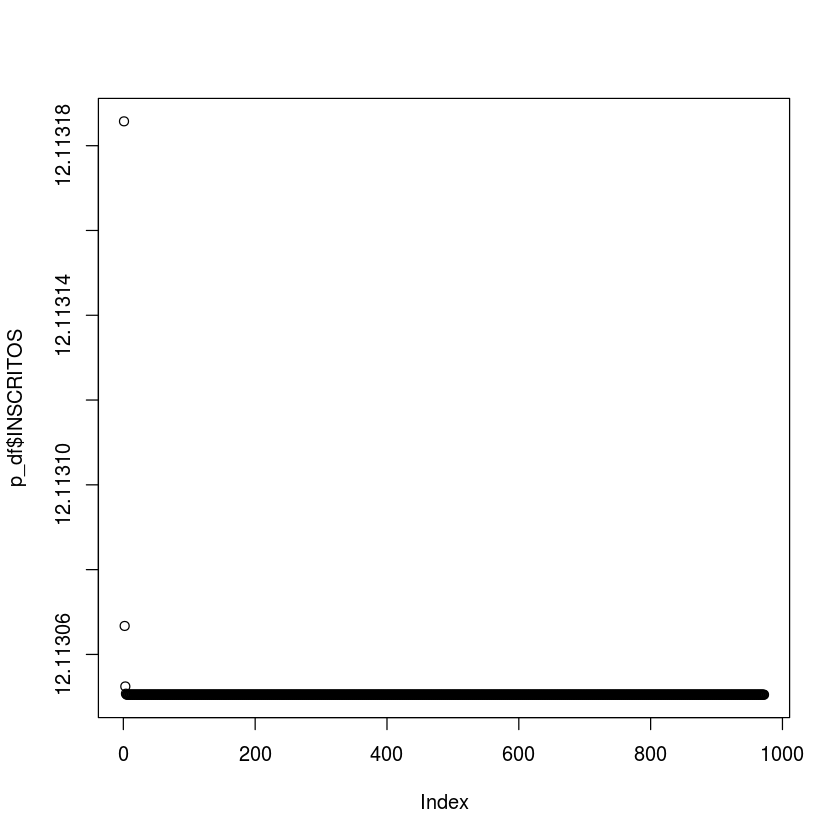

In [54]:
plot(p_df$INSCRITOS)